<a href="https://colab.research.google.com/github/Hemanth9336/Analyzing-Feature-Selection-Techniques-for-Machine-Learning-Based-Anomaly-Detection-in-IOT-System.-/blob/main/Genetic_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-learn

In [ ]:
pip install sklearn-genetic

     |████████████████████████████████| 160 kB 9.7 MB/s 


In [ ]:
pip install sklearn-genetic-opt

In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
#Load the data
df1 = pd.read_csv('/content/Tuesday-WorkingHours.pcap_ISCX.csv')
df2 = pd.read_csv('/content/Wednesday-workingHours.pcap_ISCX.csv')
df3 = pd.read_csv('/content/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')

In [ ]:
#Combining of three Dataframes into one Dataframe 
frames = [df1,df2,df3]
df = pd.concat(frames)

In [ ]:
#It gives an overview about a Dataframe columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80256 entries, 0 to 30927
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0    Destination Port             80256 non-null  int64  
 1    Flow Duration                80256 non-null  int64  
 2    Total Fwd Packets            80256 non-null  int64  
 3    Total Backward Packets       80256 non-null  int64  
 4   Total Length of Fwd Packets   80256 non-null  int64  
 5    Total Length of Bwd Packets  80256 non-null  int64  
 6    Fwd Packet Length Max        80256 non-null  int64  
 7    Fwd Packet Length Min        80256 non-null  int64  
 8    Fwd Packet Length Mean       80256 non-null  float64
 9    Fwd Packet Length Std        80256 non-null  float64
 10  Bwd Packet Length Max         80256 non-null  int64  
 11   Bwd Packet Length Min        80256 non-null  int64  
 12   Bwd Packet Length Mean       80256 non-null  float64
 13   

In [ ]:
#By default the head function returns the first 5 rows
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,88,511,7,4,452,370,226,0,64.571429,110.276708,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [ ]:
#By default the tail function returns the first 5 rows
df.tail()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
30923,443,60485447,13,16,1184,4304,517,0,91.076923,185.477519,...,20.0,36791.33333,29183.25978,96361.0,24730.0,1.000000e+07,2578.819006,10000000.0,10000000.0,BENIGN
30924,80,60857363,13,14,489,9479,423,0,37.615385,115.805540,...,20.0,64145.16667,32205.04413,129883.0,50846.0,1.000000e+07,13451.294590,10000000.0,9978661.0,BENIGN
30925,80,60784103,10,10,795,340,747,0,79.500000,234.543173,...,20.0,69414.16667,45825.78214,162955.0,50447.0,1.000000e+07,15195.601900,10000000.0,9974689.0,BENIGN
30926,80,115496215,20,19,4714,644,1545,0,235.700000,561.867197,...,20.0,67059.45455,143381.38690,499367.0,23479.0,9.999820e+06,13463.615110,10000000.0,9960719.0,BENIGN
30927,80,115569259,16,14,472,257,388,0,29.500000,95.611715,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Count the number of rows and column in the data set
df.shape

(80256, 79)

In [ ]:
#Explore the data
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [ ]:
df = df.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [ ]:
df.rename({' Label':'Attacks'},axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

Attacks_encoder = LabelEncoder()
df['Attacks']=Attacks_encoder.fit_transform(df['Attacks'].astype(str))

label=df['Attacks']

In [ ]:
#splitting the model into training and testing set
X_train, X_test, y_train, y_test = train_test_split(df, 
                                                    label, test_size=0.30, 
                                                    random_state=101)

In [ ]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9999872697414485


In [ ]:
#training a logistics regression model
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print("Accuracy = "+ str(accuracy_score(y_test,predictions)))

Accuracy = 0.968288925948086


In [ ]:
#defining various steps required for the genetic algorithm
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

def fitness_score(population):
    scores = []
    for chromosome in population:
        logmodel.fit(X_train.iloc[:,chromosome],y_train)
        predictions = logmodel.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

def crossover(pop_after_sel):
    population_nextgen=pop_after_sel
    for i in range(len(pop_after_sel)):
        child=pop_after_sel[i]
        child[3:7]=pop_after_sel[(i+1)%len(pop_after_sel)][3:7]
        population_nextgen.append(child)
    return population_nextgen

def mutation(pop_after_cross,mutation_rate):
    population_nextgen = []
    for i in range(0,len(pop_after_cross)):
        chromosome = pop_after_cross[i]
        for j in range(len(chromosome)):
            if random.random() < mutation_rate:
                chromosome[j]= not chromosome[j]
        population_nextgen.append(chromosome)
    #print(population_nextgen)
    return population_nextgen

def generations(size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, y_train, y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print(scores[:2])
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

##Print the selected features

In [ ]:
from sklearn.svm import LinearSVC
from __future__ import print_function
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets, linear_model

from genetic_selection import GeneticSelectionCV


def main():
    #Combining of three Dataframes into one Dataframe 
    frames = [df1,df2,df3]
    df = pd.concat(frames)
    # Some noisy data not correlated
    e = np.random.uniform(0, 0.2, size=(len(df), 30))
    df = df.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
    
    df.rename({' Label':'Attacks'},axis=1,inplace=True)
    Attacks_encoder = LabelEncoder()
    df['Attacks']=Attacks_encoder.fit_transform(df['Attacks'].astype(str))

    X = np.hstack((df, e))
    y = df['Attacks']

    estimators = linear_model.LogisticRegression(solver="liblinear", multi_class="ovr")

    selectors = GeneticSelectionCV(estimators,
                                  cv=6,
                                  verbose=2,
                                  scoring="accuracy",
                                  max_features=10,
                                  n_population=60,
                                  crossover_proba=0.9,
                                  mutation_proba=0.03,
                                  n_generations=15,
                                  crossover_independent_proba=0.6,
                                  mutation_independent_proba=0.06,
                                  tournament_size=4,
                                  n_gen_no_change=20,
                                  caching=True,
                                  n_jobs=-2)
    selectors = selectors.fit(X, y)

    print(selectors.support_)


if __name__ == "__main__":
    main()

Selecting features with genetic algorithm.
gen	nevals	avg                            	std                            	min                            	max                               
0  	60    	[ 0.971844  5.383333  0.003739]	[ 0.032894  2.714723  0.021349]	[ 0.754959  1.        0.000059]	[  0.980651  10.         0.16271 ]
1  	50    	[-499.07301     3.283333  500.004994]	[ 2179.662138     1.984033  2179.448326]	[-10000.            0.            0.000059]	[     0.986509      9.        10000.      ]
2  	51    	[-499.071009    3.083333  500.001505]	[ 2179.662597     2.525151  2179.449126]	[-10000.            0.            0.000059]	[     0.993698     10.        10000.      ]
3  	51    	[-665.751288    3.683333  666.669658]	[ 2494.682903     2.831323  2494.437458]	[-10000.            0.            0.000059]	[     0.993847     10.        10000.      ]
4  	54    	[-165.696714    4.466667  166.668194]	[ 1280.317235     2.472965  1280.190759]	[-10000.            0.            0.000059]	[    

In [ ]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#Load the data
data1 = pd.read_csv('/content/Tuesday-WorkingHours.pcap_ISCX.csv')
data2 = pd.read_csv('/content/Wednesday-workingHours.pcap_ISCX.csv')
data3 = pd.read_csv('/content/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')

#Combining of three Dataframes into one Dataframe 
frames = [data1,data2,data3]
data = pd.concat(frames)

data = data.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

data.rename({' Label':'Attacks'},axis=1,inplace=True)

Attacks_encoder = LabelEncoder()
data['Attacks']=Attacks_encoder.fit_transform(data['Attacks'].astype(str))

n_samples = len(data)
X = data
y = data['Attacks']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

clf = RandomForestClassifier()

##data is fitted with the help of GASearchCV

In [ ]:
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

param_grid = {'min_weight_fraction_leaf': Continuous(0.01, 0.5, distribution='log-uniform'),
              'bootstrap': Categorical([True, False]),
              'max_depth': Integer(2, 30), 
              'max_leaf_nodes': Integer(2, 35), 
              'n_estimators': Integer(100, 300)}

cv = StratifiedKFold(n_splits=3, shuffle=True)

evolved_estimator = GASearchCV(estimator=clf,
                               cv=cv,
                               scoring='accuracy',
                               population_size=10,
                               generations=15,
                               tournament_size=3,
                               elitism=True,
                               crossover_probability=0.9,
                               mutation_probability=0.03,
                               param_grid=param_grid,
                               criteria='max',
                               algorithm='eaMuPlusLambda',
                               n_jobs=-1,
                               verbose=True,
                               keep_top_k=4)

In [ ]:
evolved_estimator.fit(X_train,y_train)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.967993	0.0134746  	0.980959   	0.951819   
1  	18    	0.980202	0.00147787 	0.980959   	0.977246   
2  	20    	0.980974	1.9926e-05 	0.980989   	0.98093    
3  	18    	0.980986	8.9116e-06 	0.980989   	0.980959   
4  	19    	0.98098 	1.90207e-05	0.980989   	0.98093    
5  	20    	0.980968	2.31992e-05	0.980989   	0.98093    
6  	20    	0.980983	1.18806e-05	0.980989   	0.980959   
7  	20    	0.980986	8.91054e-06	0.980989   	0.980959   
8  	19    	0.98098 	1.36129e-05	0.980989   	0.980959   
9  	20    	0.98098 	1.36121e-05	0.980989   	0.980959   
10 	20    	0.980974	1.4852e-05 	0.980989   	0.980959   
11 	15    	0.980983	1.18806e-05	0.980989   	0.980959   
12 	20    	0.980989	1.05886e-09	0.980989   	0.980989   
13 	17    	0.980983	1.18821e-05	0.980989   	0.980959   
14 	20    	0.980989	1.21307e-09	0.980989   	0.980989   
15 	16    	0.980989	1.05886e-09	0.980989   	0.980989   


GASearchCV(crossover_probability=0.9,
           cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
           estimator=RandomForestClassifier(bootstrap=False, max_depth=3,
                                            max_leaf_nodes=7,
                                            min_weight_fraction_leaf=0.01668616611927558,
                                            n_estimators=283),
           generations=15, keep_top_k=4, mutation_probability=0.03, n_jobs=-1,
           param_grid={'bootstrap': <sklearn_genetic.space...
                       'max_depth': <sklearn_genetic.space.space.Integer object at 0x7fb5ef78aa10>,
                       'max_leaf_nodes': <sklearn_genetic.space.space.Integer object at 0x7fb659c485d0>,
                       'min_weight_fraction_leaf': <sklearn_genetic.space.space.Continuous object at 0x7fb659c48410>,
                       'n_estimators': <sklearn_genetic.space.space.Integer object at 0x7fb659c48690>},
           population_size=10

In [ ]:
y_predicy_ga = evolved_estimator.predict(X_test)
accuracy_score(y_test,y_predicy_ga)

0.9820121446666582

In [ ]:
evolved_estimator.best_params_

{'bootstrap': False,
 'max_depth': 3,
 'max_leaf_nodes': 7,
 'min_weight_fraction_leaf': 0.01668616611927558,
 'n_estimators': 283}

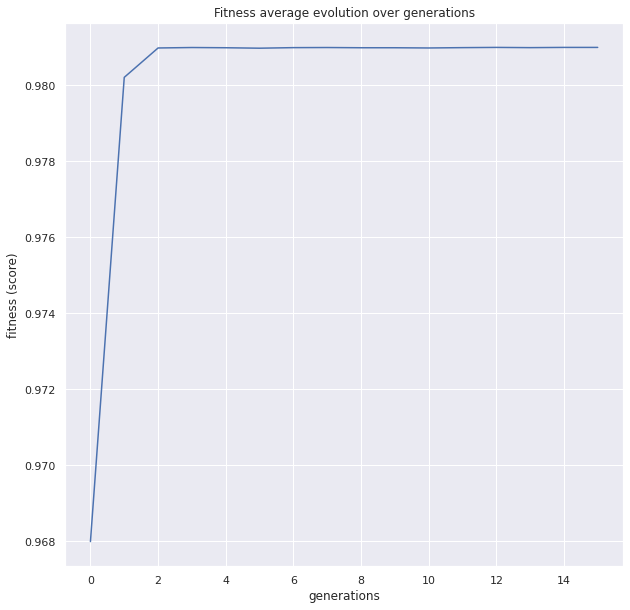

In [ ]:
plot_fitness_evolution(evolved_estimator)
plt.show()

In [ ]:
print(evolved_estimator.logbook)

                                                                                                                                                        parameters                                                                                                                                                        
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
bootstrap	cv_scores                         	fit_time                             	index	max_depth	max_leaf_nodes	min_weight_fraction_leaf	n_estimators	score   	score_time                        	test_score                        	train_score                       
False    	[0.95179112 0.95179112 0.95187595]	[4.78227305 4.94342732 3.5443809 ]   	0    	2        	29   

In [ ]:
evolved_estimator.hof

{0: {'bootstrap': False,
  'max_depth': 3,
  'max_leaf_nodes': 7,
  'min_weight_fraction_leaf': 0.01668616611927558,
  'n_estimators': 283},
 1: {'bootstrap': False,
  'max_depth': 3,
  'max_leaf_nodes': 26,
  'min_weight_fraction_leaf': 0.01668616611927558,
  'n_estimators': 242},
 2: {'bootstrap': True,
  'max_depth': 23,
  'max_leaf_nodes': 26,
  'min_weight_fraction_leaf': 0.01668616611927558,
  'n_estimators': 242},
 3: {'bootstrap': False,
  'max_depth': 3,
  'max_leaf_nodes': 7,
  'min_weight_fraction_leaf': 0.01668616611927558,
  'n_estimators': 283}}

In [ ]:
chromo,score=generations(size=20,n_feat=79,n_parents=10,mutation_rate=0.10,
                     n_gen=15,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
clf.fit(X_train.iloc[:,chromo[-1]],y_train)
predictions = clf.predict(X_test.iloc[:,chromo[-1]])
print("Accuracy score after genetic algorithm is= "+str(accuracy_score(y_test,predictions)))

[0.9708477079169477, 0.9707585961070869]
[0.9710641223123242, 0.9710641223123242]
[0.9697019846473082, 0.9697019846473082]
[0.9709495499853602, 0.9709495499853602]
[0.9716115234300409, 0.9716115234300409]
[0.9693709979249678, 0.9693709979249678]
[0.9703130370577826, 0.9703130370577826]
[0.965170012602956, 0.965170012602956]
[0.9683271167237406, 0.9683271167237406]
[0.9698292872328237, 0.9698292872328237]
[0.9699820503354423, 0.9699820503354423]
[0.969905668784133, 0.969905668784133]
[0.9714714905859738, 0.9714714905859738]
[0.9685180706020139, 0.9685180706020139]
[0.9686835639631841, 0.9686835639631841]
Accuracy score after genetic algorithm is= 0.9999872697414485


In [ ]:
chromo,score=generations(size=20,n_feat=79,n_parents=10,mutation_rate=0.10,
                     n_gen=15,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
logmodel.fit(X_train.iloc[:,chromo[-1]],y_train)
predictions = logmodel.predict(X_test.iloc[:,chromo[-1]])
print("Accuracy score after genetic algorithm is= "+str(accuracy_score(y_test,predictions)))

[0.9712805367077005, 0.9706567540386746]
[0.9699565898183392, 0.9699565898183392]
[0.9681107023283643, 0.9681107023283643]
[0.9689508993927667, 0.9689508993927667]
[0.9672068539712042, 0.9672068539712042]
[0.9650172495003374, 0.9650172495003374]
[0.9638587959721462, 0.9638587959721462]
[0.968059781294158, 0.968059781294158]
[0.9657556044963274, 0.9657556044963274]
[0.9699311293012362, 0.9699311293012362]
[0.9665066897508688, 0.9665066897508688]
[0.9679833997428487, 0.9679833997428487]
[0.9715860629129378, 0.9715860629129378]
[0.9684416890507046, 0.9684416890507046]
[0.9702111949893703, 0.9702111949893703]
Accuracy score after genetic algorithm is= 0.9535600168039413


##we can select the features with the help of the genetic selection function

In [ ]:
from genetic_selection import GeneticSelectionCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

df1 = pd.read_csv('/content/Tuesday-WorkingHours.pcap_ISCX.csv')
df2 = pd.read_csv('/content/Wednesday-workingHours.pcap_ISCX.csv')
df3 = pd.read_csv('/content/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')

frames = [df1,df2,df3]
df = pd.concat(frames)

df = df.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
df.rename({' Label':'Attacks'},axis=1,inplace=True)
Attacks_encoder = LabelEncoder()
df['Attacks']=Attacks_encoder.fit_transform(df['Attacks'].astype(str))

x = df.drop('Attacks',axis=1)
Y = df['Attacks']
estimators = DecisionTreeClassifier()
models = GeneticSelectionCV(
    estimators, cv=5, verbose=0,
    scoring="accuracy", max_features=10,
    n_population=100, crossover_proba=0.9,
    mutation_proba=0.03, n_generations=15,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
models = models.fit(x, Y)
print('Feature Selection:', x.columns[models.support_])

Feature Selection: Index([' Destination Port', ' Fwd Packet Length Std', ' Bwd Packet Length Min',
       ' Fwd URG Flags', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Variance', ' Subflow Fwd Bytes',
       ' min_seg_size_forward'],
      dtype='object')


In [ ]:
#split dataset in features and target variable
feature_cols = [' Destination Port', ' Fwd Packet Length Std', ' Bwd Packet Length Min',
       ' Fwd URG Flags', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Variance', ' Subflow Fwd Bytes',
       ' min_seg_size_forward']
x = df[feature_cols] # Features
Y = df['Attacks'] # Target variable

In [ ]:
# Split dataset into training set and test set
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.994226855505254
